# DDA5002_HW4
by Xiaocao_225040374

## Problem 1 - Solution

### (a) Integer Programming via Branch&Bound

0. Solve the original problem as a linear programming problem. Denote this problem as node 0.

    Set $z^* = -\infty$.

In [1]:
import coptpy as cp
from coptpy import COPT

env = cp.Envr()
linear_model_p1 = env.createModel("HW4_problem1")
# Disable logging
linear_model_p1.setParam(COPT.Param.Logging, 0)

# load data
c = [2, 3, 4, 7]
A = [[4, 6, -2, 8],
     [1, 2, -6, 7],]
b = [20, 10]
n = 4

# Define variables
x = linear_model_p1.addVars(n, nameprefix="x", lb=0)

# Add constraints
linear_model_p1.addMConstr(A, x, cp.COPT.EQUAL, b, nameprefix="constraint")

# Define objective function
linear_model_p1.setMObjective(None, c, 0.0, None, None, x, cp.COPT.MAXIMIZE)

# Solve the model
linear_model_p1.solve()

if linear_model_p1.status == COPT.OPTIMAL:
    print("Optimal objective value:", linear_model_p1.objVal)
    for i in range(n):
        print(f"x[{i+1}] = {x[i].x}")
else:
    print("Node 0 is infeasible.")

Cardinal Optimizer v7.2.11. Build date Aug  1 2025
Copyright Cardinal Operations 2025. All Rights Reserved

Optimal objective value: 27.647058823529406
x[1] = 0.0
x[2] = 0.0
x[3] = 1.7647058823529402
x[4] = 2.941176470588235


1. According to the output, the optimal value is $27.6471$, with $x_1=0, x_2=0, x_3=1.7647, x_4=2.9412$. 

    Divide node 0 into two branches: node 1 with constraint $x_3 \leq 1$ and node 2 with constraint $x_3 \geq 2$. Solve the two new LP problems separately.

    $z^*$ remains $-\infty$.

In [2]:
# to node 1: x3 <= 1
linear_model_p1_n1 = linear_model_p1.clone()
linear_model_p1_n1.addConstr(x[2] <= 1, name="branch1_constraint")
linear_model_p1_n1.solve()

vars_n1 = linear_model_p1_n1.getVars()
if linear_model_p1_n1.status == COPT.OPTIMAL:
    print("Node 1:")
    print("Optimal objective value:", linear_model_p1_n1.objVal)
    for i, var in enumerate(vars_n1):
        print(f"x[{i+1}] = {var.x}")
else:
    print("Node 1 is infeasible.")

Node 1:
Optimal objective value: 21.3
x[1] = 1.3
x[2] = 0.0
x[3] = 1.0
x[4] = 2.1


In [3]:
# to node 2: x3 >= 2
linear_model_p1_n2 = linear_model_p1.clone()
linear_model_p1_n2.addConstr(x[2] >= 2, name="branch2_constraint")
linear_model_p1_n2.solve()

vars_n2 = linear_model_p1_n2.getVars()
if linear_model_p1_n2.status == COPT.OPTIMAL:
    print("Node 2:")
    print("Optimal objective value:", linear_model_p1_n2.objVal)
    for i, var in enumerate(vars_n2):
        print(f"x[{i+1}] = {var.x}")
else:
    print("Node 2 is infeasible.")

Node 2 is infeasible.


2. Among the two nodes, node 1 has the optimal value of $21.3$ with $x_1=1.3, x_2=0, x_3=1, x_4=2.1$. 

    Divide node 1 into two branches: node 3 with constraint $x_1 \leq 1$ and node 4 with constraint $x_1 \geq 2$. Solve the two new LP problems separately.

    $z^*$ remains $-\infty$.

In [4]:
# 1 to node 3: x1 <= 1
linear_model_p1_n3 = linear_model_p1_n1.clone()
linear_model_p1_n3.addConstr(x[0] <= 1, name="branch3_constraint")
linear_model_p1_n3.solve()

vars_n3 = linear_model_p1_n3.getVars()
if linear_model_p1_n3.status == COPT.OPTIMAL:
    print("Node 3:")
    print("Optimal objective value:", linear_model_p1_n3.objVal)
    for i, var in enumerate(vars_n3):
        print(f"x[{i+1}] = {var.x}")
else:
    print("Node 3 is infeasible.")

Node 3:
Optimal objective value: 21.230769230769234
x[1] = 1.0
x[2] = 0.23076923076923078
x[3] = 1.0
x[4] = 2.076923076923077


In [5]:
# 1 to node 4: x1 >= 2
linear_model_p1_n4 = linear_model_p1_n1.clone()
linear_model_p1_n4.addConstr(x[0] >= 2, name="branch4_constraint")
linear_model_p1_n4.solve()

vars_n4 = linear_model_p1_n4.getVars()
if linear_model_p1_n4.status == COPT.OPTIMAL:
    print("Node 4:")
    print("Optimal objective value:", linear_model_p1_n4.objVal)
    for i, var in enumerate(vars_n4):
        print(f"x[{i+1}] = {var.x}")
else:
    print("Node 4 is infeasible.")

Node 4:
Optimal objective value: 17.88235294117647
x[1] = 2.0
x[2] = 0.0
x[3] = 0.5882352941176467
x[4] = 1.6470588235294117


3. Till now, node 3 has higher optimal value $21.23$ with $x_1=1, x_2=0.23, x_3=1, x_4=2.08$, compared to node 2 whose optimal value is $17.88$.

    So next step, we deal with node 3 first. Divide node 3 by $x_2$. Due to $x_2=0.23$ while $x_2 \geq 0$, so we only need to consider node 5 with constraint $x_2 \geq 1$.

    $z^*$ remains $-\infty$.

In [6]:
# 3 to node 5: x2 >= 1
linear_model_p1_n5 = linear_model_p1_n3.clone()
linear_model_p1_n5.addConstr(x[1] >= 1, name="branch5_constraint")
linear_model_p1_n5.solve()

vars_n5 = linear_model_p1_n5.getVars()
if linear_model_p1_n5.status == COPT.OPTIMAL:
    print("Node 5:")
    print("Optimal objective value:", linear_model_p1_n5.objVal)
    for i, var in enumerate(vars_n5):
        print(f"x[{i+1}] = {var.x}")
else:
    print("Node 5 is infeasible.")

Node 5:
Optimal objective value: 21.0
x[1] = 0.0
x[2] = 1.0
x[3] = 1.0
x[4] = 2.0


4. Node 5 has optimal value $21$ with $x_1 = 0, x_2 = 1, x_3 = 1, x_4 = 2$. Since all variables are integers, we have found a feasible solution. 

    Update $z^* = 21$. $x^* = (0, 1, 1, 2)$.

    At present, the remaining node that is not fathomed is node 4, whose optimal value is $19.8$. Since $19.8 < 21$, we can fathom node 4.

As a result, the lower bound equals to the upper bound, and the optimal solution of the integer programming problem is $21$, with $x_1 = 0, x_2 = 1, x_3 = 1, x_4 = 2$. The branch-and-bound tree is as follows:

<img src="HW4P1a.svg" style="max-width: 100%; height: auto;">


### (b) Optimal Solution
1. We cannot be assured that the current incumbent $z$ is optimal only because the upper–lower bound gap satisfies $\overline{z} - \underline{z} \leq 1$.

   Take this example:
   \begin{align*}
    \text{Max} \quad & 0.5x \\
    \text{s.t} \quad & x \in \{0, 1, 2\} \\
    \end{align*}
    If the current incumbent is $x = 1$ with $z = 0.5$, and the LP relaxation gives $\overline{z} = 0.9$, then we have $\overline{z} - \underline{z} = 0.4 \leq 1$, but the optimal solution is $x = 2$ with $z = 1$. Hence, we cannot conclude that the current incumbent is optimal.

2. If all coefficients in the objective function are integers, then we can be assured.

   Since all coefficients in the objective function are integers, the optimal value of the integer programming problem must also be an integer. If the upper-lower bound gap satisfies $\overline{z} - \underline{z} < 1$, then there is no integer between $\underline{z}$ and $\overline{z}$ except $\underline{z}$ itself. Therefore, the current incumbent $z = \underline{z}$ must be the optimal solution.

## Problem 2 - Solution

### (a) Stationary Points

First, calculate the gradient of $f(x)$:
$$
\nabla f(x) = (4x_1^3 + 6x_1^2 - 4x_2x_1, \quad 8x_2 - 2x_1^2)^T
$$

Set $\nabla f(x) = 0$, we have the following equations:
\begin{align*}
4x_1^3 + 6x_1^2 - 4x_2x_1 &= 0 \\
8x_2 - 2x_1^2 &= 0
\end{align*}
Solve the equations, we get all the stationary points：$(0, 0), (-2, 1)$.



Second, calculate the Hessian matrix of $f(x)$:
$$
H(x) = \begin{bmatrix}
12x_1^2 + 12x_1 - 4x_2 & -4x_1 \\
-4x_1 & 8 \\
\end{bmatrix}
$$

For point $(0, 0)$:
$$
H(0, 0) = \begin{bmatrix}
0 & 0 \\
0 & 8 \\
\end{bmatrix}
$$

Obviously, $H(0, 0)$ is positive semidefinite.

For all $d \neq 0$,
$$
d^T H(0, 0) d = 8d_2^2 \geq 0
$$
Consider $f(x_1, 0) = x_1^4 + 2x_1^3$. When $x_1 < 0$ and is close to $0$, $f(x_1, 0) < f(0, 0) = 0$. So $(0, 0)$ is not a local minimum point.

Consider $f(0, x_2) = 4x_2^2$. When $x_2$ is close to $0$, $f(0, x_2) \geq f(0, 0) = 0$. So $(0, 0)$ is a saddle point.

For point $(-2, 1)$:
$$
H(-2, 1) = \begin{bmatrix}
8 & 8 \\
8 & 8 \\
\end{bmatrix}
$$

Obviously, $H(-2, 1)$ is positive semidefinite.
Denote $d = (d_1, d_2)^T$. For all $d \neq 0$,
$$
d^T H(-2, 1) d = 8(d_1^2 + 2d_1d_2 + d_2^2) = 8(d_1 + d_2)^2 \geq 0
$$
So $(-2, 1)$ is also a local minimum point.


### (b) Plot

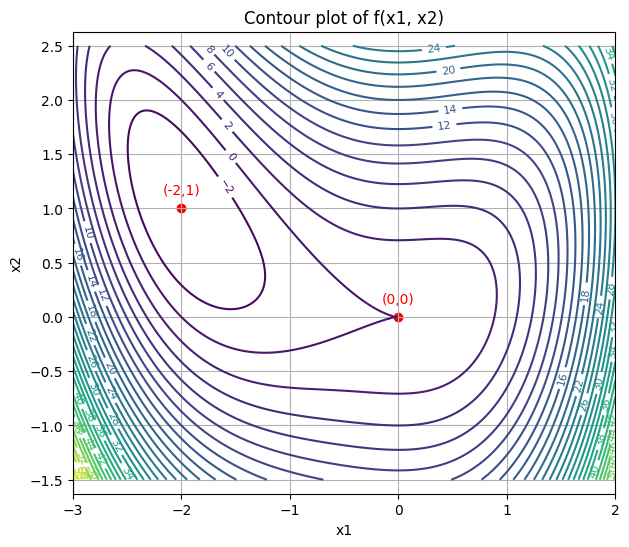

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x1, x2):
    return x1**4 + 2*(x1 - x2)*x1**2 + 4*x2**2

x1 = np.linspace(-3, 2, 300)
x2 = np.linspace(-1.5, 2.5, 300)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# Stationary points
stat_points = np.array([[0.0, 0.0], [-2.0, 1.0]])
stat_values = np.array([f(x[0], x[1]) for x in stat_points])

plt.figure(figsize=(7,6))
cs = plt.contour(X1, X2, Z, levels=40)
plt.clabel(cs, inline=True, fontsize=8)
plt.scatter(stat_points[:,0], stat_points[:,1], color='red')
for i, txt in enumerate(['(0,0)', '(-2,1)']):
    plt.annotate(txt, (stat_points[i,0], stat_points[i,1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')

plt.title('Contour plot of f(x1, x2)')
plt.xlabel('x1'); plt.ylabel('x2')
plt.axis('equal'); plt.grid(True)
plt.show()


## Problem 3 - Solution

$A_1$ is a diagonal matrix, but its diagonal elements are not all positive, so it is indefinite.

As for $A_2$, we can calculate its leading principal minors:
- $M_1 = 1 > 0$
- $M_2 = 1 > 0$
- $M_3 = Det(A_2) = 1*5 - 2*2 + (-1) = 0$
So $A_2$ is positive semidefinite.

$A_3$ and $A_4$ are not symmetric matrices, so they are indefinite. Now analyze the PSD using $\frac{1}{2}(A+A^T)$.

As for $A_3$:
\begin{align*}
\frac{1}{2}(A_3 + A_3^T) &= \begin{bmatrix}
1 & 0 & 0.5 \\
0 & 1 & 0.5 \\
0.5 & 0.5 & 4 \\
\end{bmatrix}
\end{align*}

$Det(A3) = 3.5$. All leading principal minors are positive, so $A_3$ is positive definite under this criterion.

As for $A_4$:
\begin{align*}
\frac{1}{2}(A_4 + A_4^T) &= \begin{bmatrix}
1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & 0 \\
\end{bmatrix}
\end{align*}

Obviously, $A_4$ is still indefinite under this criterion.

Calculate the eigenvalues for $A_3$ and $A_4$ as follows:

In [2]:
import numpy as np
A3 = np.array([[1, 0, 1], [0, 1, -1], [0, 2, 4]])
A4 = np.array([[1, 0, 1], [0, -1, -1], [-1, 1, 0]])
ev_A3 = np.linalg.eigvals(A3)
ev_A4 = np.linalg.eigvals(A4)

print("Eigenvalues of A3:", np.round(ev_A3, 2))
print("Eigenvalues of A4:", np.round(ev_A4, 2))

Eigenvalues of A3: [1. 2. 3.]
Eigenvalues of A4: [ 0.+1.j  0.-1.j -0.+0.j]


In [1]:
import numpy as np
np.random.uniform(1, 25, size=1)

array([8.71040808])